In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const
from scipy.optimize import minimize_scalar
from scipy import sparse

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import DoubleTweezer, TwoSiteLattice

# Set up trap parameters

In [2]:
### Erbium ###

spacing_xy = 266*si.nm
spacing_z = 532*si.nm

trap: TwoSiteLattice = TwoSiteLattice(

    lattice_spacing_x = spacing_xy,
    lattice_spacing_y = spacing_xy,
    lattice_spacing_z = spacing_z,
    lattice_depth_x = 0,
    lattice_depth_y = 0,
    lattice_depth_z = 0,

    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer = 0,
    waist_tweezer = 0,

    m = 168 * const.value("atomic mass constant"),
    mu_b = 6.982806* const.value("Bohr magneton"),
    a_s = 137* const.value("Bohr radius"),
    a = 180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

E_r_xy = const.h**2/(8*trap.m*spacing_xy**2)

trap[trap.lattice_depth_x] = 15*E_r_xy
trap[trap.lattice_depth_y] = 15*E_r_xy

#mult=4 for AR=1 / mult=0.25 for AR=2
mult=4
trap[trap.lattice_depth_z] = mult* 15*E_r_xy

In [3]:
E_r_z = const.h**2/(8*trap.m*spacing_z**2)

trap.subs(trap.lattice_depth_z/E_r_z)

240.000000000000

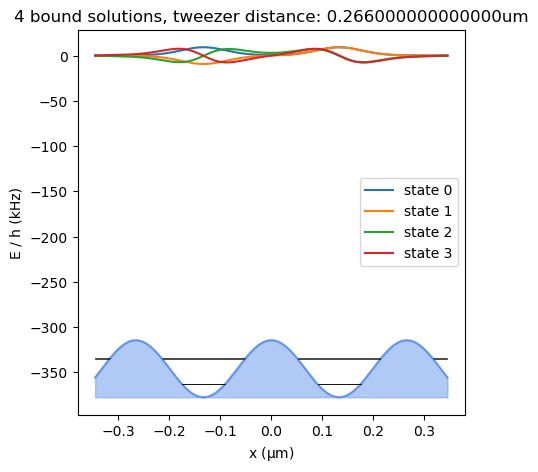

In [4]:
left_cutoff = -1.3*float(trap.subs(trap.lattice_spacing_x))
right_cutoff = 1.3*float(trap.subs(trap.lattice_spacing_x))


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.x, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
#bound_states = energies < potential(left_cutoff)
bound_states = energies < np.inf

z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.lattice_spacing_x)/si.um}um")
ax.set_xlabel(r"x ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e2, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

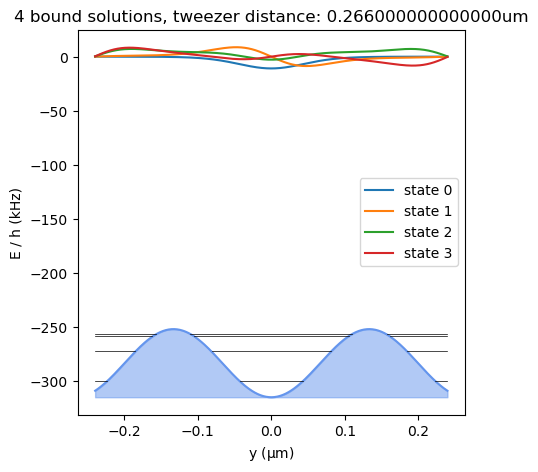

In [5]:
left_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_y))
right_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_y))


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.y, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
#bound_states = energies < potential(left_cutoff)
bound_states = energies < np.inf

z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.lattice_spacing_x)/si.um}um")
ax.set_xlabel(r"y ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e2, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

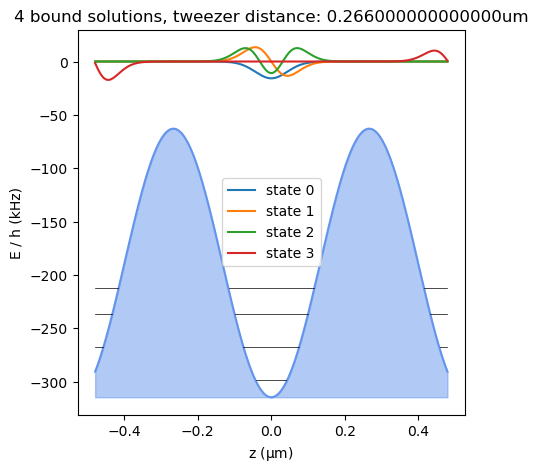

In [6]:
left_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_z))
right_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_z))


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.z, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
#bound_states = energies < potential(left_cutoff)
bound_states = energies < np.inf

z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.lattice_spacing_x)/si.um}um")
ax.set_xlabel(r"z ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e2, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

# Check parameters

In [7]:
V = trap.subs(trap.get_potential(apply_zero_offset=False))
a = float(trap.subs(trap.lattice_spacing_x))

#find minima of potential
def V_func(x):
    return float(V.subs({trap.x:x, trap.y:0, trap.z:0}))
#x_right = minimize_scalar(V_func,bracket=[1e-3*a,a/2],bounds=[0,a/2]).x
#x_left = minimize_scalar(V_func,bracket=[-a/2,-1e-3*a],bounds=[-a/2,0]).x
x_right = a/2
x_left = -a/2

#catch case where both potentials have already merged
tunneling_dist = abs(x_right-x_left)
if tunneling_dist < 1e-15:
    raise Exception("potential has only one minmum")

#depts of both tweezers
V_1 = abs(V_func(x_left) - V_func(0))
V_2 = abs(V_func(x_right) - V_func(0)) 

#trapping frequencies
omega_x1, omega_x2 = trap.get_both_omega(trap.x)
omega_y1, omega_y2 = trap.get_both_omega(trap.y)
omega_z1, omega_z2 = trap.get_both_omega(trap.z)

#recoil energy
E_r = const.h**2/(8*trap.m*trap.lattice_spacing_x**2)

#print results
print(f"depth: {V_2/float(trap.subs(E_r)):.2f} E_r")

print(f"trapping frequency x: {trap.subs(omega_x1)/2/np.pi:.2f} Hz")
print(f"trapping frequency y: {trap.subs(omega_y1)/2/np.pi:.2f} Hz")
print(f"trapping frequency z: {trap.subs(omega_z1)/2/np.pi:.2f} Hz")

print(f"aspect ratio: {sp.sqrt(omega_x1/omega_z1):.4f}")

print(f"tunneling distance: {tunneling_dist/si.nm:.2f} um")

depth: 15.00 E_r
trapping frequency x: 32502.74 Hz
trapping frequency y: 32502.74 Hz
trapping frequency z: 32502.74 Hz
aspect ratio: 1.0000
tunneling distance: 266.00 um


# Diagonalise

In [8]:
n_grid_1D = 50

n_pot_steps = [n_grid_1D,n_grid_1D,n_grid_1D]
n_levels = 15


left_cutoff = -1.3*float(trap.subs(trap.lattice_spacing_x))
right_cutoff = 1.3*float(trap.subs(trap.lattice_spacing_x))
back_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_y))
front_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_y))
bottom_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_z))
top_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_z))

extend = [(left_cutoff,right_cutoff),
          (back_cutoff,front_cutoff),
          (bottom_cutoff,top_cutoff)]


# Solve the hamiltonian numerically
energies, states, potential, coords = trap.nstationary_solution(
        [trap.x,trap.y,trap.z], extend, n_pot_steps, k=n_levels,
        method="matrix_free", export=True)


x = coords[trap.x]
y = coords[trap.y]
z = coords[trap.z]
x3D,y3D,z3D = np.meshgrid(coords[trap.x],coords[trap.y],coords[trap.z],indexing="ij")
pot = potential(x3D,y3D,z3D)


files saved with ...._2025-03-27_13-50-44


# Plot results

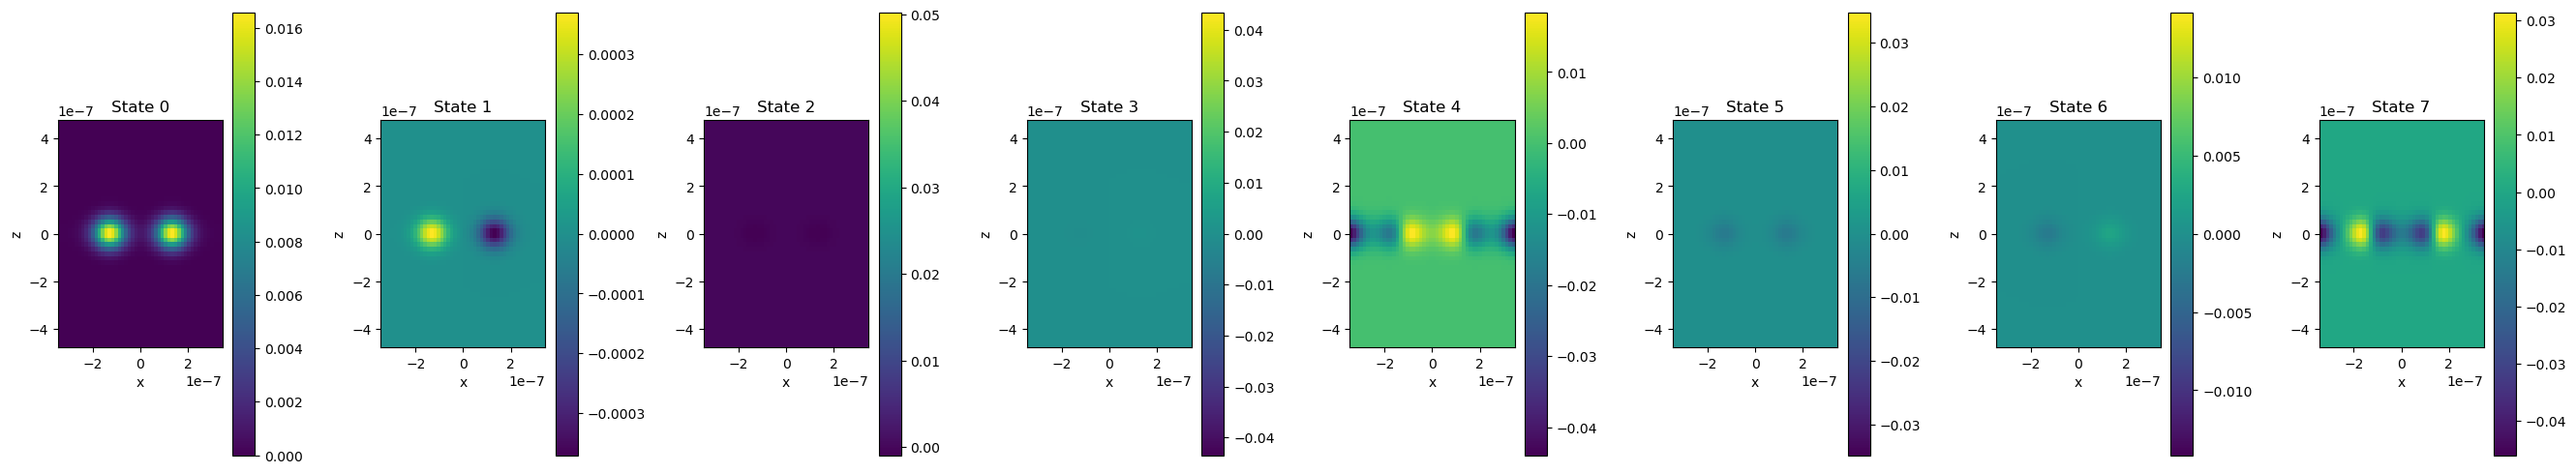

In [9]:
n_states = 8

states_plot = states.real
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number, :, int(n_pot_steps[0]/2), :].T,
                   extent=[*extend[0], *extend[2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# Let's also make one for AR=2

In [10]:
#mult=4 for AR=1 / mult=0.25 for AR=2
mult=0.25
trap[trap.lattice_depth_z] = mult* 15*E_r_xy

In [11]:
n_grid_1D = 50

n_pot_steps = [n_grid_1D,n_grid_1D,n_grid_1D]
n_levels = 15


left_cutoff = -1.3*float(trap.subs(trap.lattice_spacing_x))
right_cutoff = 1.3*float(trap.subs(trap.lattice_spacing_x))
back_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_y))
front_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_y))
bottom_cutoff = -0.9*float(trap.subs(trap.lattice_spacing_z))
top_cutoff = 0.9*float(trap.subs(trap.lattice_spacing_z))

extend = [(left_cutoff,right_cutoff),
          (back_cutoff,front_cutoff),
          (bottom_cutoff,top_cutoff)]


# Solve the hamiltonian numerically
energies, states, potential, coords = trap.nstationary_solution(
        [trap.x,trap.y,trap.z], extend, n_pot_steps, k=n_levels,
        method="matrix_free", export=True)


x = coords[trap.x]
y = coords[trap.y]
z = coords[trap.z]
x3D,y3D,z3D = np.meshgrid(coords[trap.x],coords[trap.y],coords[trap.z],indexing="ij")
pot = potential(x3D,y3D,z3D)


files saved with ...._2025-03-27_13-59-14


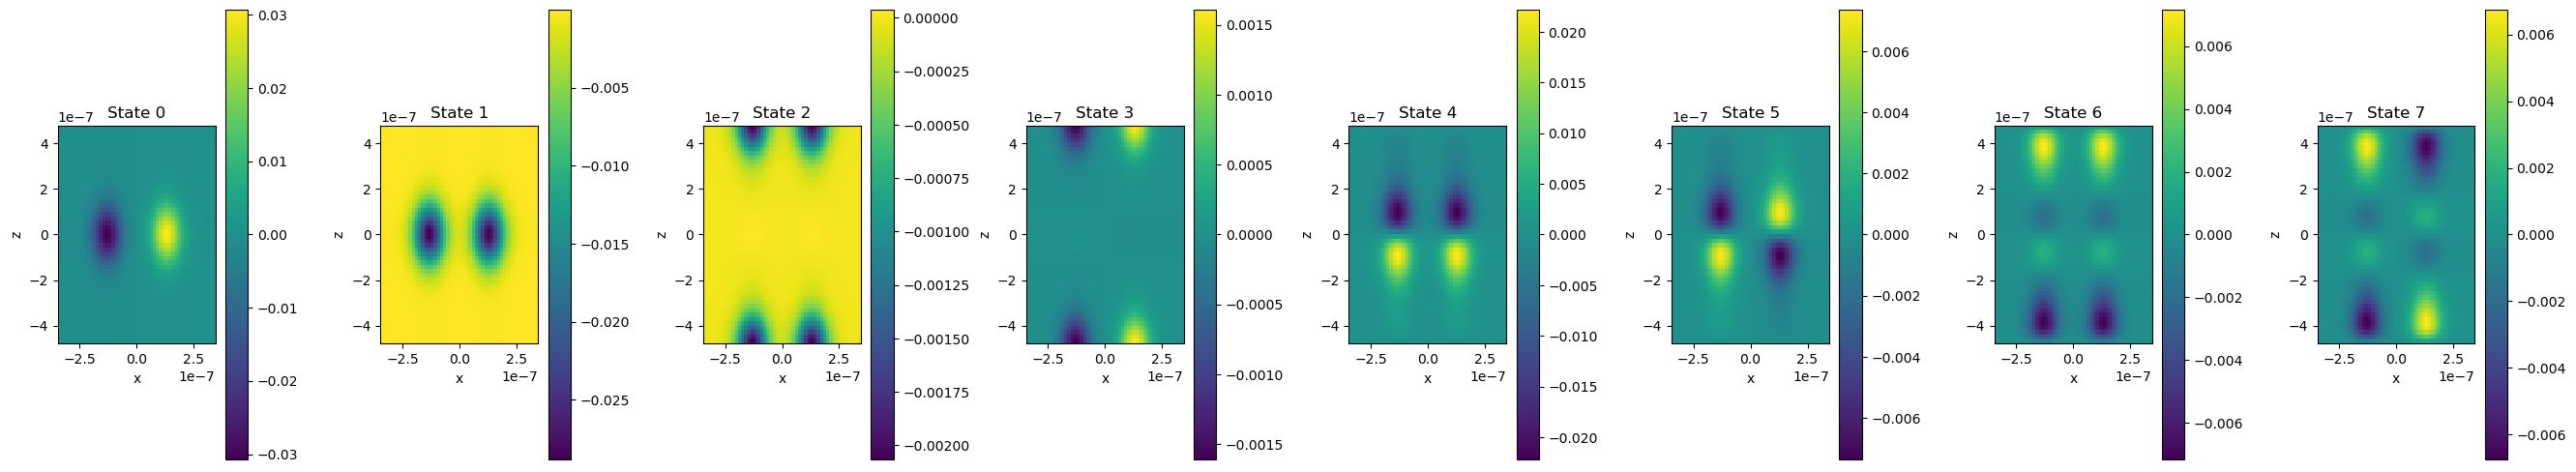

In [12]:
n_states = 8

states_plot = states.real
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number, :, int(n_pot_steps[0]/2), :].T,
                   extent=[*extend[0], *extend[2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
